In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib as plt
from DataMacpy import *
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

DataMacpy Setup


In [2]:
df = pd.read_csv("train3.csv")
df.head(5)

,Dağıtılan Enerji (MWh),month,year,date,hour,o_clock,season,HourControl
0,1593.944216,1,2018,2018-01-01,00:00:00,0,Winter,Night
1,1513.933887,1,2018,2018-01-01,01:00:00,1,Winter,Night
2,1402.612637,1,2018,2018-01-01,02:00:00,2,Winter,Night
3,1278.527266,1,2018,2018-01-01,03:00:00,3,Winter,Night
4,1220.697701,1,2018,2018-01-01,04:00:00,4,Winter,Night


In [3]:
df.rename(columns ={'Dağıtılan Enerji (MWh)':'DE'}, inplace=True)

In [4]:
df.tail(5)

,DE,month,year,date,hour,o_clock,season,HourControl
40147,2492.489498,7,2022,2022-07-31,19:00:00,19,Summer,Night
40148,2479.958245,7,2022,2022-07-31,20:00:00,20,Summer,Night
40149,2485.016884,7,2022,2022-07-31,21:00:00,21,Summer,Night
40150,2396.574255,7,2022,2022-07-31,22:00:00,22,Summer,Night
40151,2285.252844,7,2022,2022-07-31,23:00:00,23,Summer,Night


In [5]:
y = df.DE

In [6]:
y

0        1593.944216
1        1513.933887
2        1402.612637
3        1278.527266
4        1220.697701
            ...     
40147    2492.489498
40148    2479.958245
40149    2485.016884
40150    2396.574255
40151    2285.252844
Name: DE, Length: 40152, dtype: float64

In [7]:
X = df.copy()
X.drop(["DE", "date", "hour"], axis=1, inplace=True)

In [8]:
X

,month,year,o_clock,season,HourControl
0,1,2018,0,Winter,Night
1,1,2018,1,Winter,Night
2,1,2018,2,Winter,Night
3,1,2018,3,Winter,Night
4,1,2018,4,Winter,Night
...,...,...,...,...,...
40147,7,2022,19,Summer,Night
40148,7,2022,20,Summer,Night
40149,7,2022,21,Summer,Night
40150,7,2022,22,Summer,Night


In [9]:
object_cols, d = calc_object_cols(X)

In [10]:
object_cols

['season', 'HourControl']

In [11]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,month,year,o_clock,season,HourControl
0,1,2018,0,3.0,1.0
1,1,2018,1,3.0,1.0
2,1,2018,2,3.0,1.0
3,1,2018,3,3.0,1.0
4,1,2018,4,3.0,1.0
...,...,...,...,...,...
40147,7,2022,19,2.0,1.0
40148,7,2022,20,2.0,1.0
40149,7,2022,21,2.0,1.0
40150,7,2022,22,2.0,1.0


In [12]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [13]:
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [14]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
mean_absolute_percentage_error(y_valid, y_pred) * 100

7.419465931357161

In [15]:
# y_sum = y.sum()

In [16]:
# y_sum/y.shape[0]

In [17]:
# y_pred[:5]

In [18]:
#for i, tahmin in enumerate(y_pred):
#    if 200 < tahmin - 1700:
#        y_pred[i] = 0.99 * y_pred[i]
#    elif -200 > tahmin - 1700:
#        y_pred[i] = 1.01 * y_pred[i]

In [19]:
#y_pred[:5]

In [20]:
mean_absolute_percentage_error(y_valid, y_pred)*100

7.419465931357161

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM

dl_model = keras.Sequential([
    layers.BatchNormalization(input_shape=[5]),
    layers.Dense(units=512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(1)
])

dl_model.compile(optimizer='sgd', loss='mae', metrics=['mae'],)

history = dl_model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_valid, y_valid),)

Epoch 1/20
251/251 [==============================] - 5s 11ms/step - loss: 942.1489 - mae: 942.1489 - val_loss: 1386.0376 - val_mae: 1386.0376
Epoch 2/20
251/251 [==============================] - 2s 9ms/step - loss: 244.3623 - mae: 244.3623 - val_loss: 371.9001 - val_mae: 371.9001
Epoch 3/20
251/251 [==============================] - 2s 9ms/step - loss: 231.2820 - mae: 231.2820 - val_loss: 172.0694 - val_mae: 172.0694
Epoch 4/20
251/251 [==============================] - 3s 10ms/step - loss: 222.8941 - mae: 222.8941 - val_loss: 190.4839 - val_mae: 190.4839
Epoch 5/20
251/251 [==============================] - 3s 11ms/step - loss: 215.2800 - mae: 215.2800 - val_loss: 173.5523 - val_mae: 173.5523
Epoch 6/20
251/251 [==============================] - 2s 9ms/step - loss: 212.9373 - mae: 212.9373 - val_loss: 162.0332 - val_mae: 162.0332
Epoch 7/20
251/251 [==============================] - 2s 9ms/step - loss: 211.7608 - mae: 211.7608 - val_loss: 164.0684 - val_mae: 164.0684
Epoch 8/20
251/

<AxesSubplot: >

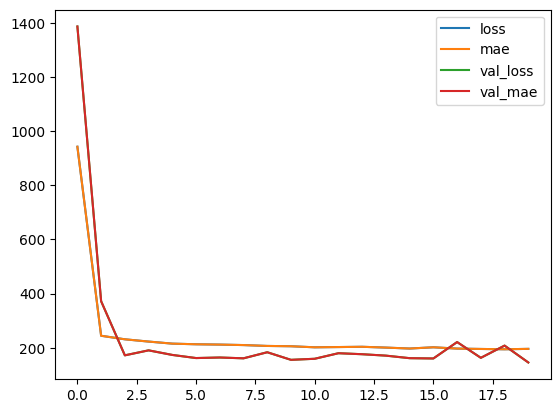

In [22]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [23]:
y_pred2 = dl_model.predict(X_valid)
mean_absolute_percentage_error(y_valid, y_pred2) * 100

251/251 [==============================] - 1s 2ms/step


8.046846374464481

In [24]:
y_pred.shape

(8031,)

In [25]:
y_pred2.shape

(8031, 1)

In [26]:
y_pred2 = y_pred2.reshape(8031,)

In [27]:
y_pred3 = y_pred * 0.8 + y_pred2 * 0.2

In [28]:
y_pred3

array([2182.46669954, 1689.55976536, 1681.38714601, ..., 1205.22599372,
       1375.61692154, 2342.06709545])

In [29]:
mean_absolute_percentage_error(y_valid, y_pred3) * 100

7.346179441705646